In [57]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [58]:
def interp_spline(x, y, bc_start=None, bc_end=None, axis=0):
    x=np.array(x)
    y=np.array(y)

    print(x)
    print(y)
    
    cs=[]

    if bc_start is None:
        bc_start = np.zeros((len(x)))
    if bc_end is None:
        bc_end = np.zeros((len(x)))

    for y0, bc_0, bc_1  in zip(y, bc_start, bc_end):
        print(x,y0, bc_0, bc_1)
        cs.append(CubicSpline(x,y0, bc_type=((1, bc_0), (1, bc_1))))
        
    def fun(x0):
        vals=np.zeros((len(x0),len(cs)))
        for idx, cs_curr in enumerate(cs):
            vals[:,idx] = cs_curr(x0)
        return vals
            
    return fun

[0. 1.]
[[20 40]
 [10 50]
 [ 5 10]]
[0. 1.] [20 40] 0 10
[0. 1.] [10 50] 0 5
[0. 1.] [ 5 10] 0 20


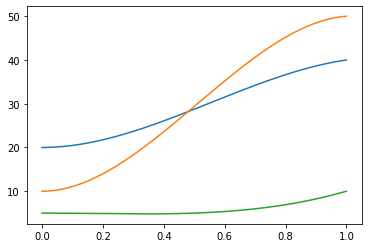

In [59]:
curr_position = [20,10,5]
curr_velocity = [0,0,0]
next_position = [40,50, 10]
next_velocity = [10,5,20]


x=np.hstack((0.0, 1.0))
y=np.vstack((curr_position, next_position)).T

dydx=[0,10]

# Get the spline
cs=interp_spline(x,y,bc_start=curr_velocity, bc_end=next_velocity)
x0=np.linspace(0,1.0,200)
data=cs(x0)

plt.plot(x0,data)

[0. 1.]
[[0. 1.]]
[0. 1.] [0. 1.] 0 1.0


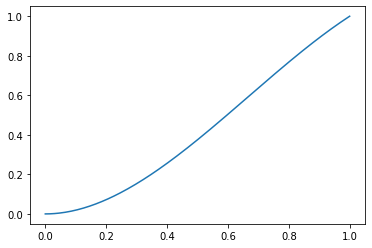

In [67]:
curr_position = [0]
curr_velocity = [0]
next_position = [1.0]
next_velocity = [1.0]


x=np.hstack((0.0, 1.0))
y=np.vstack((curr_position, next_position)).T

dydx=[0,10]

# Get the spline
cs=interp_spline(x,y,bc_start=curr_velocity, bc_end=next_velocity)
x0=np.linspace(0,1.0,200)
data=cs(x0)

plt.plot(x0,data)